In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd '/content/drive/MyDrive/twitter'

/content/drive/MyDrive/twitter


In [3]:
ls

cardiffnlp/  database.db  result.csv  templates/  train.csv
config.ini   instance/    static/     test.csv


In [4]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

train = pd.read_csv('train.csv',encoding='ISO-8859-1')
print(train.shape)
print(train)
test = pd.read_csv('test.csv',encoding='ISO-8859-1')

dataframe = train.append(test,ignore_index=True,sort=True)
dataframe

(99989, 3)
       ItemID  Sentiment                                      SentimentText
0           1          0                       is so sad for my APL frie...
1           2          0                     I missed the New Moon trail...
2           3          1                            omg its already 7:30 :O
3           4          0            .. Omgaga. Im sooo  im gunna CRy. I'...
4           5          0           i think mi bf is cheating on me!!!   ...
...       ...        ...                                                ...
99984   99996          0  @Cupcake  seems like a repeating problem   hop...
99985   99997          1  @cupcake__ arrrr we both replied to each other...
99986   99998          0                     @CuPcAkE_2120 ya i thought so 
99987   99999          1  @Cupcake_Dollie Yes. Yes. I'm glad you had mor...
99988  100000          1                    @cupcake_kayla haha yes you do 

[99989 rows x 3 columns]


<ipython-input-4-b705b6443d4b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = train.append(test,ignore_index=True,sort=True)


,ItemID,Sentiment,SentimentText
0,1,0.0,is so sad for my APL frie...
1,2,0.0,I missed the New Moon trail...
2,3,1.0,omg its already 7:30 :O
3,4,0.0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0.0,i think mi bf is cheating on me!!! ...
...,...,...,...
399973,299996,NaN,"@martine2323 'Morning, Petal - work brought me..."
399974,299997,NaN,"@martinetrene Hello,little bird! i finally st..."
399975,299998,NaN,@MartinezMayra I got u at work when I go buy o...
399976,299999,NaN,@martinfaux He certainly gives good interview


In [5]:
import re
import numpy as np

def remove_pattern(text,pattern):
  t = re.findall(pattern,text)
  for i in t:
    text = re.sub(i,'',text)
  return text

In [6]:
dataframe['filteredText'] = np.vectorize(remove_pattern)(dataframe['SentimentText'], "@[\w]*")
dataframe

,ItemID,Sentiment,SentimentText,filteredText
0,1,0.0,is so sad for my APL frie...,is so sad for my APL frie...
1,2,0.0,I missed the New Moon trail...,I missed the New Moon trail...
2,3,1.0,omg its already 7:30 :O,omg its already 7:30 :O
3,4,0.0,.. Omgaga. Im sooo im gunna CRy. I'...,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0.0,i think mi bf is cheating on me!!! ...,i think mi bf is cheating on me!!! ...
...,...,...,...,...
399973,299996,NaN,"@martine2323 'Morning, Petal - work brought me...","'Morning, Petal - work brought me here (banki..."
399974,299997,NaN,"@martinetrene Hello,little bird! i finally st...","Hello,little bird! i finally started on Rick..."
399975,299998,NaN,@MartinezMayra I got u at work when I go buy o...,I got u at work when I go buy one u know ima ...
399976,299999,NaN,@martinfaux He certainly gives good interview,He certainly gives good interview


In [7]:
dataframe['filteredText'] = dataframe['filteredText'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
dataframe

,ItemID,Sentiment,SentimentText,filteredText
0,1,0.0,is so sad for my APL frie...,friend.............
1,2,0.0,I missed the New Moon trail...,missed Moon trailer...
2,3,1.0,omg its already 7:30 :O,already 7:30
3,4,0.0,.. Omgaga. Im sooo im gunna CRy. I'...,Omgaga. sooo gunna CRy. I've been this dentist...
4,5,0.0,i think mi bf is cheating on me!!! ...,think cheating me!!!
...,...,...,...,...
399973,299996,NaN,"@martine2323 'Morning, Petal - work brought me...","'Morning, Petal work brought here (banking IT)..."
399974,299997,NaN,"@martinetrene Hello,little bird! i finally st...","Hello,little bird! finally started Rick's movi..."
399975,299998,NaN,@MartinezMayra I got u at work when I go buy o...,work when know
399976,299999,NaN,@martinfaux He certainly gives good interview,certainly gives good interview


In [8]:
tokenized_tweet = dataframe['filteredText'].apply(lambda x: x.split())

tokenized_tweet.head()

0                                [friend.............]
1                           [missed, Moon, trailer...]
2                                      [already, 7:30]
3    [Omgaga., sooo, gunna, CRy., I've, been, this,...
4                             [think, cheating, me!!!]
Name: filteredText, dtype: object

In [9]:

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

dataframe['filteredText'] = tokenized_tweet
dataframe.head()

,ItemID,Sentiment,SentimentText,filteredText
0,1,0.0,is so sad for my APL frie...,friend.............
1,2,0.0,I missed the New Moon trail...,missed Moon trailer...
2,3,1.0,omg its already 7:30 :O,already 7:30
3,4,0.0,.. Omgaga. Im sooo im gunna CRy. I'...,Omgaga. sooo gunna CRy. I've been this dentist...
4,5,0.0,i think mi bf is cheating on me!!! ...,think cheating me!!!


In [10]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests

In [11]:
all_words_positive = ' '.join(text for text in dataframe['filteredText'][dataframe['Sentiment']==0])
all_words_positive

Output hidden; open in https://colab.research.google.com to view.

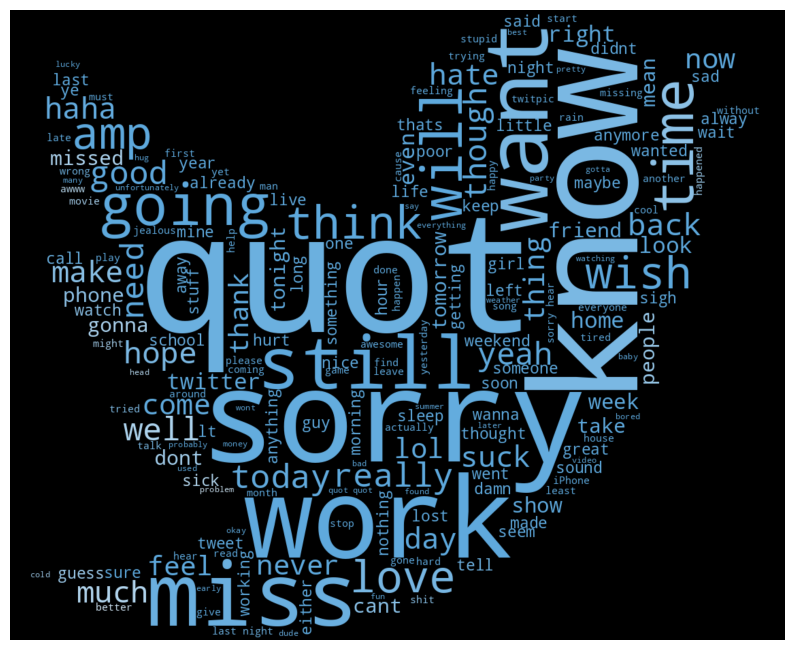

In [12]:
import matplotlib.pyplot as plt

# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_positive)

# Size of the image generated
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

plt.axis('off')
plt.show()

In [13]:
all_words_negative = ' '.join(text for text in dataframe['filteredText'][dataframe['Sentiment']==1])
all_words_negative

Output hidden; open in https://colab.research.google.com to view.

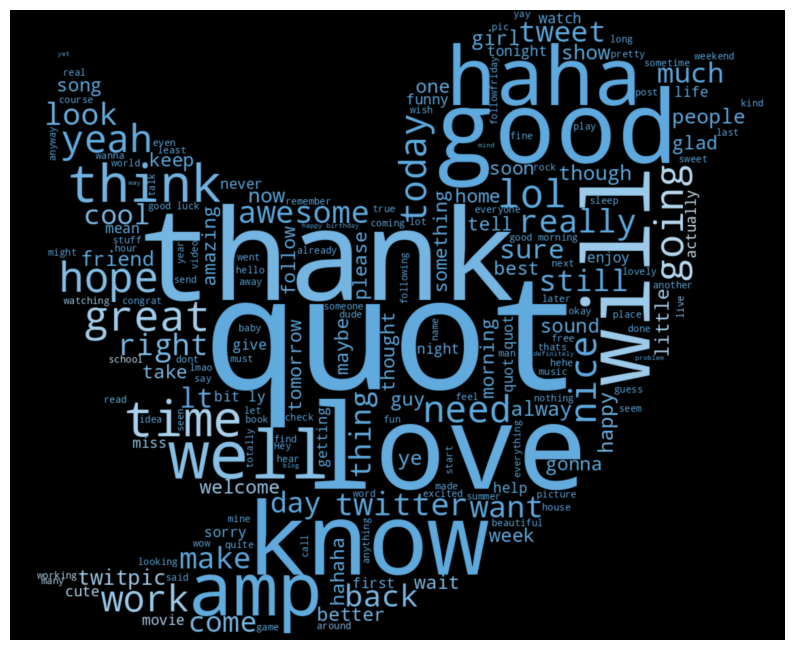

In [14]:
import matplotlib.pyplot as plt

Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_negative)

# Size of the image generated
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated
plt.imshow(wc.recolor(color_func=image_colors),interpolation="gaussian")

plt.axis('off')
plt.show()


In [15]:
def extract_hashtag(text):
  hashtags = []

  for i in text:
    tags = re.findall(r'#(\w+)',i)
    if tags != []:
      # print(tags)
      hashtags.append(tags)
    # print(tags)
  return hashtags

In [16]:
positive_tags = extract_hashtag(dataframe['filteredText'][dataframe['Sentiment']==0])
print(positive_tags)

[['3turnoffwords'], ['asylm'], ['squarespace'], ['Susan'], ['twenty20'], ['iphone', 'comics'], ['Magic'], ['kosherFAIL'], ['squarespace', 'trackle'], ['canucks'], ['Battleground'], ['saveohiolibraries'], ['IranElection'], ['squarespace'], ['sadpanda'], ['SongStuckInMyHeadWhenIWokeUp'], ['betseyjohnson'], ['IMISSCATH', 'IMISSCATH', 'IMISSCATH', 'IMISSCATH', 'IMISSCATH', 'IMISSCATH', 'IMISSCATH', 'IMISSCATH', 'IMISSCATH', 'IMISSCATH', 'IMISSCATH', 'IMISSCATH'], ['p1wimax'], ['trackle'], ['lol', 'fail'], ['mlia'], ['squaresp', 'squarespac', 'squarespace', 'trackle'], ['fail'], ['barakatday', 'barakatday', 'barakatday', 'barakatday'], ['Iran'], ['Iran', 'iranelection'], ['atltweet'], ['PakCricket'], ['imjustsayin'], ['talesfrmsurbs'], ['IranElection'], ['MCRchat'], ['whocangetit'], ['600'], ['cricket'], ['inaperfectworld'], ['masterchef'], ['littlekuribohYGOASsoundtrackalbum'], ['OSX'], ['FAIL'], ['wordcamp'], ['squarespace'], ['SYTYCD'], ['ChuckMeMondays', 'chuck'], ['redeye'], ['bb10'], 

In [17]:
positive_tags = sum(positive_tags,[])
positive_tags

['3turnoffwords',
 'asylm',
 'squarespace',
 'Susan',
 'twenty20',
 'iphone',
 'comics',
 'Magic',
 'kosherFAIL',
 'squarespace',
 'trackle',
 'canucks',
 'Battleground',
 'saveohiolibraries',
 'IranElection',
 'squarespace',
 'sadpanda',
 'SongStuckInMyHeadWhenIWokeUp',
 'betseyjohnson',
 'IMISSCATH',
 'IMISSCATH',
 'IMISSCATH',
 'IMISSCATH',
 'IMISSCATH',
 'IMISSCATH',
 'IMISSCATH',
 'IMISSCATH',
 'IMISSCATH',
 'IMISSCATH',
 'IMISSCATH',
 'IMISSCATH',
 'p1wimax',
 'trackle',
 'lol',
 'fail',
 'mlia',
 'squaresp',
 'squarespac',
 'squarespace',
 'trackle',
 'fail',
 'barakatday',
 'barakatday',
 'barakatday',
 'barakatday',
 'Iran',
 'Iran',
 'iranelection',
 'atltweet',
 'PakCricket',
 'imjustsayin',
 'talesfrmsurbs',
 'IranElection',
 'MCRchat',
 'whocangetit',
 '600',
 'cricket',
 'inaperfectworld',
 'masterchef',
 'littlekuribohYGOASsoundtrackalbum',
 'OSX',
 'FAIL',
 'wordcamp',
 'squarespace',
 'SYTYCD',
 'ChuckMeMondays',
 'chuck',
 'redeye',
 'bb10',
 'work',
 'ignitephx',
 'y

In [18]:
negative_tags =  extract_hashtag(dataframe['filteredText'][dataframe['Sentiment']==1])
negative_tags

[['poemsunder140'],
 ['Video'],
 ['a'],
 ['robotpickuplines'],
 ['skydiving'],
 ['andyhurleyday'],
 ['ASOT400'],
 ['followfriday'],
 ['mcflyforgermany',
  'mcflyforgermany',
  'mcflyforgermany',
  'mcflyforgermany',
  'mcflyforgermany',
  'mcflyforgermany',
  'mcflyforgermany',
  'mcflyforgermany'],
 ['Hello', 'World', 'beautiful', '5am', 'woop'],
 ['shortstack',
  'tokiohotel',
  'shortstack',
  'tokiohotel',
  'shortstack',
  'tokiohotel',
  'shortstack',
  'tokiohotel',
  'shortstack',
  'tokiohotel',
  'shortstack'],
 ['Geek_And_Poke'],
 ['Holiday'],
 ['Holiday'],
 ['myweakness'],
 ['alpolitics'],
 ['followfriday'],
 ['stats'],
 ['followfriday'],
 ['f3s'],
 ['Herschel', 'Planck'],
 ['musicmonday'],
 ['Followfriday'],
 ['FollowFriday'],
 ['squarespace'],
 ['squarespace'],
 ['clothdiapers'],
 ['Canterbury', 'music'],
 ['UnfollowSunday'],
 ['istillbelieve'],
 ['Followfriday'],
 ['100miletraining', 'sweatfest'],
 ['10yearsofEnema'],
 ['30SECONDSTOMARS', 'marsiscoming'],
 ['30secondstom

In [19]:
negative_tags = sum(negative_tags,[])
negative_tags

['poemsunder140',
 'Video',
 'a',
 'robotpickuplines',
 'skydiving',
 'andyhurleyday',
 'ASOT400',
 'followfriday',
 'mcflyforgermany',
 'mcflyforgermany',
 'mcflyforgermany',
 'mcflyforgermany',
 'mcflyforgermany',
 'mcflyforgermany',
 'mcflyforgermany',
 'mcflyforgermany',
 'Hello',
 'World',
 'beautiful',
 '5am',
 'woop',
 'shortstack',
 'tokiohotel',
 'shortstack',
 'tokiohotel',
 'shortstack',
 'tokiohotel',
 'shortstack',
 'tokiohotel',
 'shortstack',
 'tokiohotel',
 'shortstack',
 'Geek_And_Poke',
 'Holiday',
 'Holiday',
 'myweakness',
 'alpolitics',
 'followfriday',
 'stats',
 'followfriday',
 'f3s',
 'Herschel',
 'Planck',
 'musicmonday',
 'Followfriday',
 'FollowFriday',
 'squarespace',
 'squarespace',
 'clothdiapers',
 'Canterbury',
 'music',
 'UnfollowSunday',
 'istillbelieve',
 'Followfriday',
 '100miletraining',
 'sweatfest',
 '10yearsofEnema',
 '30SECONDSTOMARS',
 'marsiscoming',
 '30secondstomars',
 '30secondstomars',
 '30secondstomars',
 'marsiscoming',
 'marsiscoming'

In [20]:
import nltk
word_freq_positive = nltk.FreqDist(positive_tags)

word_freq_positive

FreqDist({'inaperfectworld': 132, 'iremember': 91, 'squarespace': 89, 'dontyouhate': 74, 'haveyouever': 64, 'iranelection': 44, 'BTS': 40, 'myweakness': 36, 'BSB': 32, 'fail': 29, ...})

In [21]:
df_positive = pd.DataFrame({'Hashtag':word_freq_positive.keys(),'Count':word_freq_positive.values()})
df_positive

,Hashtag,Count
0,3turnoffwords,20
1,asylm,11
2,squarespace,89
3,Susan,2
4,twenty20,2
...,...,...
1284,Craftyma4,1
1285,Stokke,1
1286,serienjunkies,1
1287,australia,1


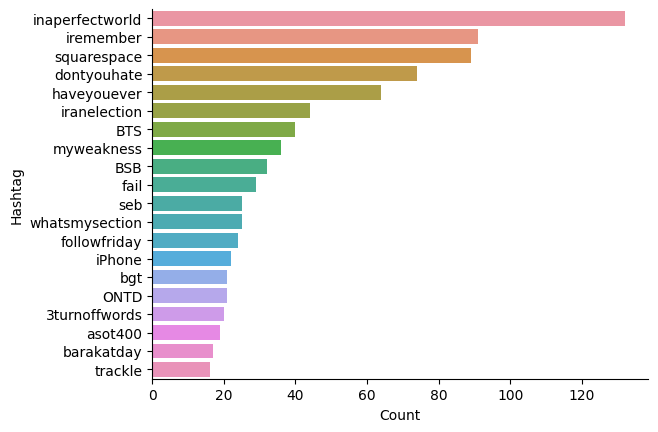

In [22]:

df_positive_plot = df_positive.nlargest(20,columns='Count')

sns.barplot(data=df_positive_plot,y='Hashtag',x='Count')
sns.despine()

In [23]:
word_freq_negative = nltk.FreqDist(negative_tags)

word_freq_negative

FreqDist({'followfriday': 432, 'musicmonday': 185, 'myweakness': 145, 'FollowFriday': 112, 'iremember': 87, 'BSB': 71, 'goodsex': 53, 'marsiscoming': 51, 'haveyouever': 42, 'shaundiviney': 41, ...})

In [24]:
df_negative = pd.DataFrame({'Hashtag':word_freq_negative.keys(),'Count':word_freq_negative.values()})
df_negative

,Hashtag,Count
0,poemsunder140,1
1,Video,4
2,a,1
3,robotpickuplines,10
4,skydiving,1
...,...,...
1676,ec09,1
1677,morebonding,1
1678,youdabest,1
1679,Diabetes,1


In [25]:
custom_badwords = ['goodsex']
for i in range(len(df_negative['Hashtag'])):
  if df_negative['Hashtag'][i] in custom_badwords:
    df_negative['Hashtag'][i] = ('*'*4)
df_negative

<ipython-input-25-d5a1322352c5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_negative['Hashtag'][i] = ('*'*4)


,Hashtag,Count
0,poemsunder140,1
1,Video,4
2,a,1
3,robotpickuplines,10
4,skydiving,1
...,...,...
1676,ec09,1
1677,morebonding,1
1678,youdabest,1
1679,Diabetes,1


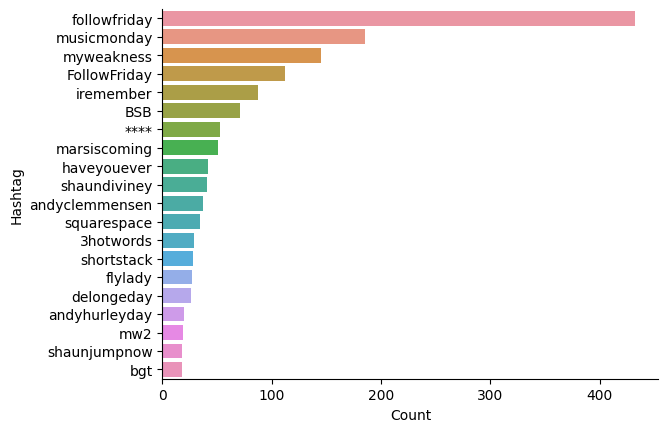

In [26]:
df_negative_plot = df_negative.nlargest(20,columns='Count')

sns.barplot(data=df_negative_plot,y='Hashtag',x='Count')
sns.despine()

In [27]:
dataframe

,ItemID,Sentiment,SentimentText,filteredText
0,1,0.0,is so sad for my APL frie...,friend.............
1,2,0.0,I missed the New Moon trail...,missed Moon trailer...
2,3,1.0,omg its already 7:30 :O,already 7:30
3,4,0.0,.. Omgaga. Im sooo im gunna CRy. I'...,Omgaga. sooo gunna CRy. I've been this dentist...
4,5,0.0,i think mi bf is cheating on me!!! ...,think cheating me!!!
...,...,...,...,...
399973,299996,NaN,"@martine2323 'Morning, Petal - work brought me...","'Morning, Petal work brought here (banking IT)..."
399974,299997,NaN,"@martinetrene Hello,little bird! i finally st...","Hello,little bird! finally started Rick's movi..."
399975,299998,NaN,@MartinezMayra I got u at work when I go buy o...,work when know
399976,299999,NaN,@martinfaux He certainly gives good interview,certainly gives good interview


In [28]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 53.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 103.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 85.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 23.4 MB/s eta 0:00:00


In [29]:
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
import numpy as np
from scipy.special import softmax
import csv
import urllib.request

# Preprocess text (username and link placeholders)
def preprocess(text):
    new_text = []


    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)

# Tasks:
# emoji, emotion, hate, irony, offensive, sentiment


task='sentiment'
MODEL = f"cardiffnlp/twitter-roberta-base-{task}"

tokenizer = AutoTokenizer.from_pretrained(MODEL)

# download label mapping
labels=[]
mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/{task}/mapping.txt"
with urllib.request.urlopen(mapping_link) as f:
    html = f.read().decode('utf-8').split("\n")
    csvreader = csv.reader(html, delimiter='\t')
labels = [row[1] for row in csvreader if len(row) > 1]

# PT
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

model.save_pretrained(MODEL)
tokenizer.save_pretrained(MODEL)

# # TF
# model = TFAutoModelForSequenceClassification.from_pretrained(MODEL)
# model.save_pretrained(MODEL)

# text = "Good night 😊"
# encoded_input = tokenizer(text, return_tensors='tf')
# output = model(encoded_input)
# scores = output[0][0].numpy()
# scores = softmax(scores)



('cardiffnlp/twitter-roberta-base-sentiment/tokenizer_config.json',
 'cardiffnlp/twitter-roberta-base-sentiment/special_tokens_map.json',
 'cardiffnlp/twitter-roberta-base-sentiment/vocab.json',
 'cardiffnlp/twitter-roberta-base-sentiment/merges.txt',
 'cardiffnlp/twitter-roberta-base-sentiment/added_tokens.json',
 'cardiffnlp/twitter-roberta-base-sentiment/tokenizer.json')

In [30]:
ls

cardiffnlp/  database.db  result.csv  templates/  train.csv
config.ini   instance/    static/     test.csv


In [31]:
def predctprob(text):
  text = preprocess(text)
  encoded_input = tokenizer(text, return_tensors='pt')
  output = model(**encoded_input)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)


  ranking = np.argsort(scores)
  ranking = ranking[::-1]
  dict1 = {}
  for i in range(scores.shape[0]):
      l = labels[ranking[i]]
      s = scores[ranking[i]]
      dict1[l] = s
      # print(f"{i+1}) {l} {np.round(float(s), 4)}")

  maxp = scores.argmax()
  return dict1,labels[maxp]


In [32]:
text = "there is some thing"
_,sentiment = predctprob(text)
print(sentiment)

neutral


In [33]:
data = dataframe['SentimentText'].head(20)
for d in data:
  _,sent = predctprob(d)
  print(sent,d)

negative                      is so sad for my APL friend.............
negative                    I missed the New Moon trailer...
neutral               omg its already 7:30 :O
negative           .. Omgaga. Im sooo  im gunna CRy. I've been at this dentist since 11.. I was suposed 2 just get a crown put on (30mins)...
negative          i think mi bf is cheating on me!!!       T_T
negative          or i just worry too much?        
positive        Juuuuuuuuuuuuuuuuussssst Chillin!!
neutral        Sunny Again        Work Tomorrow  :-|       TV Tonight
negative       handed in my uniform today . i miss you already
neutral       hmmmm.... i wonder how she my number @-)
positive       I must think about positive..
negative       thanks to all the haters up in my face all day! 112-102
negative       this weekend has sucked so far
negative      jb isnt showing in australia any more!
positive      ok thats it you win.
neutral     &lt;-------- This is the way i feel right now...
negative     aw

In [34]:
!pip install pyngrok==4.1.1
!pip install Flask-SQLAlchemy flask-ngrok

!ngrok authtoken 2LeC9QFamm1oNTjOJr54JQkZALB_3xVh9RAgACk6yNMjJFuyA

  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-4.1.1-py3-none-any.whl size=15963 sha256=26df76709de606e503aa707e6a0a887653776044ee43d7e002d774f31eadad1a
  Stored in directory: /root/.cache/pip/wheels/4c/7c/4c/632fba2ea8e88d8890102eb07bc922e1ca8fa14db5902c91a8
Successfully built pyngrok
Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [35]:
%load_ext sql


In [36]:
%%sql
sqlite:///database.db

In [37]:
# Converst bytes into a file for downloads
import os
from datetime import datetime
  # FLask SQLAlchemy, Database
from flask_sqlalchemy import SQLAlchemy
from flask_ngrok import run_with_ngrok
from flask import Flask,render_template,request,flash, redirect, url_for, send_file,session
from sqlalchemy.orm import relationship, foreign
from sqlalchemy import desc
from datetime import datetime


basedir = 'sqlite:///database.db'

app = Flask(__name__)
app.config['SQLALCHEMY_DATABASE_URI'] = basedir
app.config['SQLALCHEMY_TRACK_MODIFICATIONS'] = False
app.secret_key = 'the random string'

db = SQLAlchemy(app)

  # Picture table. By default the table name is filecontent
class ImageFile(db.Model):

      """
      The first time the app runs you need to create the table. In Python
      terminal import db, Then run db.create_all()
      """
      """ ___tablename__ = 'yourchoice' """ # You can override the default table name

      id = db.Column(db.Integer,  primary_key=True)
      name = db.Column(db.Text, nullable=False)
      clip_score = db.Column(db.Float,nullable=False)
      img_data = db.Column(db.Text, nullable=False)
      pic_date = db.Column(db.DateTime, nullable=False, default=datetime.utcnow)



class User(db.Model):
    id = db.Column(db.Integer, primary_key=True)
    uname = db.Column(db.Text, nullable=False)
    fullname = db.Column(db.Text, nullable=False)
    gender = db.Column(db.Text, nullable=False)
    phone = db.Column(db.Integer, nullable=False)
    password = db.Column(db.Text, nullable=False)
    posts = db.relationship('Post', backref='user', lazy=True)

class Post(db.Model):
    id = db.Column(db.Integer,primary_key=True)
    time = db.Column(db.DateTime, nullable=False)
    msg = db.Column(db.Text)
    positive = db.Column(db.Float)
    negative = db.Column(db.Float)
    neutral = db.Column(db.Float)
    sentiment = db.Column(db.Text, nullable=False)
    user_id = db.Column(db.Integer, db.ForeignKey('user.id'))

with app.app_context():
  db.create_all()

def printuser(user):
  print('id ',user.id)
  print('uname ',user.uname)
  print('fullname ',user.fullname)
  print('gender ',user.gender)
  print('phone ',user.phone)
  print('pass ',user.password)
  print('---------')

In [ ]:


run_with_ngrok(app)
# session['id'] = 0
@app.route('/',methods=['GET','POST'])
def home():
  try:
    if session['id']:
      posts = Post.query.order_by(desc(Post.time))

      id = session['id']
      currentuser = User.query.filter_by(id=id).first()
      if 'postbtn' in request.form:
        text = request.form.get('text')
        dict1,sentiment = predctprob(text)
        positive = round(dict1['positive'],2)
        print('postiive ',positive)
        positive = round(positive,2)
        print('postiive ',positive)
        negative = round(dict1['negative'],2)
        neutral = round(dict1['neutral'],2)
        date = datetime.now()
        user = User.query.filter_by(id=id).first()
        post = Post(time=date, msg=text, user_id=id, positive=positive, negative=negative, neutral=neutral, sentiment=sentiment)
        db.session.add(post)
        db.session.commit()

      if 'searchbtn' in request.form:
        input = request.form.get('input')
        print('input ',input)
        user = User.query.filter_by(uname=input).first()
        posts = user.posts



      return render_template('home.html',posts=posts,user=currentuser)
  except:
    print('error')
    return redirect('../login')


@app.route('/login',methods=['GET','POST'])
def login():
  if request.method=='POST':
    error = ''
    name = request.form.get('name')
    password = request.form.get('password')

    if User.query.filter_by(uname=name,password=password).all():
      user = User.query.filter_by(uname=name).first()
      session['id'] = user.id
      return redirect('../')
    else:
      error = 'Invalid username or password'
      return render_template('login.html',error=error)

  return render_template('login.html')


@app.route('/register',methods=['GET','POST'])
def register():
  if request.method=='POST':
    error = ''
    print(request.form)
    name = request.form.get('name')
    # print(request.form.get('name'))
    phone = request.form.get('phone')
    uname = request.form.get('uname')
    gender = request.form.get('gender')
    password = request.form.get('password')
    cpassword = request.form.get('cpassword')

    print(User.query.filter_by(uname=uname).all())
    if User.query.filter_by(uname=uname).all():
      error = 'Username already exists'
      print('error1 ',error)
      return render_template('register.html',error=error)
    elif len(phone) != 10:
      error = 'Invalid Phone'
      print('error2 ',error)
      return render_template('register.html',error=error)
    elif cpassword != password:
      error = 'Password is not same'
      print('error3 ',error)
      return render_template('register.html',error=error)
    else:
      user = User(fullname=name, phone=phone,uname=name,gender=gender, password=password)
      db.session.add(user)
      db.session.commit()
  users = User.query.all()
  for user in users:
    printuser(user)
  return render_template('register.html')

@app.route('/logout',methods=['GET','POST'])
def logout():
  del session['id']
  return redirect('../login')

if __name__ == '__main__':
  app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://f817-35-237-182-111.ngrok-free.app
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [07/Nov/2023 11:46:26] "GET / HTTP/1.1" 302 -


error


INFO:werkzeug:127.0.0.1 - - [07/Nov/2023 11:46:27] "GET /login HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [07/Nov/2023 11:46:29] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [07/Nov/2023 11:58:02] "GET /login HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [07/Nov/2023 12:00:44] "GET /login HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [07/Nov/2023 12:06:22] "POST /login HTTP/1.1" 302 -
INFO:werkzeug:127.0.0.1 - - [07/Nov/2023 12:06:23] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [07/Nov/2023 12:06:24] "GET /static/unnamed.png HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [07/Nov/2023 12:06:51] "POST / HTTP/1.1" 200 -


postiive  0.95
postiive  0.95


INFO:werkzeug:127.0.0.1 - - [07/Nov/2023 12:06:54] "GET /static/unnamed.png HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [07/Nov/2023 12:08:58] "POST / HTTP/1.1" 200 -


postiive  0.1
postiive  0.1


INFO:werkzeug:127.0.0.1 - - [07/Nov/2023 12:08:59] "GET /static/unnamed.png HTTP/1.1" 304 -


In [ ]:
with app.app_context():
  # db.drop_all()

  #Post.query.delete()

In [ ]:
ls